<a href="https://colab.research.google.com/github/sudharshanpaul/Machine-Learning/blob/main/Maths/Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probability

## Factorials and Combinatorics
Q. FInd the probability of getting 3 heads in 5 trails for a un-biased coin

In [ ]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from math import factorial

In [ ]:
def coinflip_head(n,r):
  n_choose_k = factorial(n)/(factorial(n-r)*factorial(r))
  return (n_choose_k) / 2**n

In [ ]:
coinflip_head(5,3)

0.3125

In [ ]:
# For gatting 1 to 5 heads
for i in range(1,6):
  print(coinflip_head(5,i))

0.15625
0.3125
0.3125
0.15625
0.03125


In [ ]:
[coinflip_head(5,i) for i in range(6)]

[0.03125, 0.15625, 0.3125, 0.3125, 0.15625, 0.03125]

## Law of Large numbers and The Gambler's Fallacy

In [ ]:
# Let we take the number of trails are exponentially increasing
ns = np.array([2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096])

In [ ]:
np.random.seed(42)

For now the 2 arguments are pf the binomial() method is the 1st one is how many coins we are flipping and the second one is the probability of getting either of the two results

In [ ]:
np.random.binomial(1,0.5)

0

In [ ]:
heads_count = [np.random.binomial(i,0.5) for i in ns]   # We can see we get the closer the proportion of 50% thherotically
heads_count

[2, 3, 4, 6, 13, 27, 54, 136, 258, 509, 1038, 2094]

In [ ]:
proportion_heads = heads_count/ns
proportion_heads

array([1.        , 0.75      , 0.5       , 0.375     , 0.40625   ,
       0.421875  , 0.421875  , 0.53125   , 0.50390625, 0.49707031,
       0.50683594, 0.51123047])

 **Gambler Fallsy**: the belief that the probability of a random event happening in the future is influenced by a past history of similar events
 but this law of large numbers disproves it and states that the experiment is not influenced by the previous step

 Probability stands on for each coin flip the probability is independent

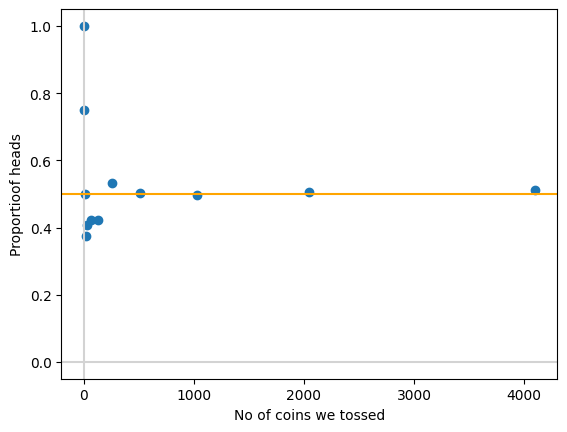

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x=0,color='lightgray')
plt.axhline(y=0,color='lightgray')
plt.xlabel('No of coins we tossed')
plt.ylabel('Proportioof heads')
ax.scatter(ns,proportion_heads)
plt.axhline(0.5,color='orange')

## Statistics

The field of statistics applies probability theory to make inferences with a quantifiable degree of confidence. For example, let's say we ran the five-coin-flip experiment 1000 times with a fair coin

In [ ]:
n_experiments = 1000
heads_count = np.random.binomial(5,0.5,n_experiments)   # Five coins are flipped for 1000 times with .5 Probability
# heads_count

We can plot our result to create the **Probability distribution**

In [ ]:
heads,event_result = np.unique(heads_count,return_counts=True)

In [ ]:
heads   # Means we have a possibility if 0,1,2,3,4,5 heads for that 5 flips in each experiment

array([0, 1, 2, 3, 4, 5])

In [ ]:
event_result   # Here the corresponding count of that chace   # Here we can see the probability of getting 2 and 3 heads is more than outer ones

array([ 33, 181, 285, 313, 160,  28])

In [ ]:
event_prob = event_result/n_experiments

Text(0, 0.5, 'Probability')

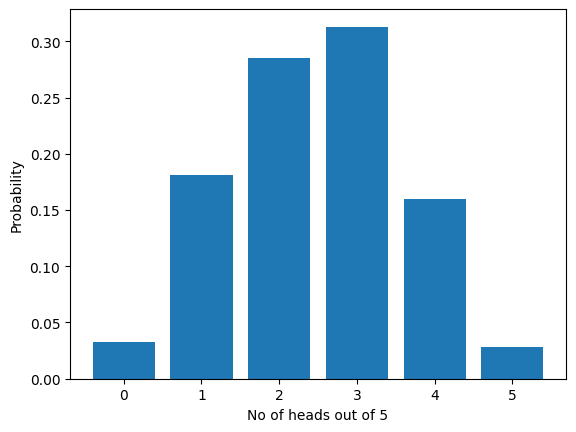

In [ ]:
plt.bar(heads,event_prob)
plt.xlabel('No of heads out of 5')
plt.ylabel('Probability')


## Expected Value:

In [ ]:
P = [coinflip_head(5,i) for i in range(6)]
P

[0.03125, 0.15625, 0.3125, 0.3125, 0.15625, 0.03125]

Expected Value for Random Discrete Variables
$$ \mathbb{E} = \sum_x xP(x) $$

In [ ]:
E = sum([P[x]*x for x in range(6)])
E

2.5

## Measure of Central Tendency
Measures of central tendency provide a summary statistic on the center of a given distribution.
There are many measures of central tendency ..., The Mean, The Median, The Mode are the most common

### Mean
The most common measure of central tendency of all (so much so that it's synonomous with the lay usage of the term "average"), is the **mean**, often symbolized with $\mu$ (population) or $\bar{x}$ (sample):


$$ \bar{x} = \frac{\sum_{i=1}^n x_i}{n} $$

Expected value is infact the long term mean of some functions

In [ ]:
len(heads_count)

1000

In [ ]:
# For sample
heads_count[:20]

array([2, 2, 2, 3, 2, 3, 3, 1, 3, 1, 1, 4, 4, 3, 2, 1, 3, 2, 1, 2])

In [ ]:
sum(heads_count)/len(heads_count)    # which is nearly equals to 2.5

2.47

Numpy built in method to calculate the mean

In [ ]:
np.mean(heads_count)

2.47

### Median
The second most common measure of Central Tendency ... It is the mid point value of the distribution

In [ ]:
heads_count.sort()

In [ ]:
heads_count[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
heads_count[-20:]

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [ ]:
len(heads_count)

1000

If the no of value are odd we'll take the middle one as the median e.g: [2,3,4,5,6] 4 is the median
For even no of values we take the average of (n-1)/2 and n/2 terms

In [ ]:
heads_count[499]

3

In [ ]:
heads_count[500]

3

In [ ]:
(3+3)/2

3.0

Built-In method

In [ ]:
np.median(heads_count)

3.0

### Mode
It is simply the most frequent value in the distribution

Method is available in Scipy in the stats module

In [ ]:
# From graph we can say 3 is the mode of this distribution
st.mode(heads_count)

ModeResult(mode=3, count=313)

In [ ]:
st.mode(heads_count)[0]

3

With small sample sizes, the mean typically provides the most accurate measure of central tendency.

With larger sample sizes, the mean, median, and mode will tend to coincide, as long as the distribution isn't skewed:

In [ ]:
x = st.skewnorm.rvs(0,size=1000)   # This gives the continuous distribution where the skewnwss is 0 mean the distribution is normally distributed

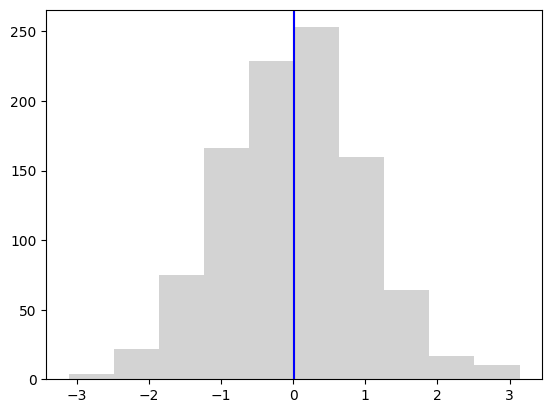

In [ ]:
fig, ax = plt.subplots()
plt.hist(x,color='lightgray')
plt.axvline(x=np.mean(x),color='orange')
plt.axvline(x=np.median(x),color='blue')

# we cant show the mode cuz this method gives PDF but mode is calculated only for PMF

For Skewed Distribution

In [ ]:
x = st.skewnorm.rvs(10,size=1000)

(array([199., 279., 219., 151.,  78.,  54.,  14.,   4.,   1.,   1.]),
 array([-0.17083839,  0.24688731,  0.66461301,  1.08233872,  1.50006442,
         1.91779012,  2.33551582,  2.75324152,  3.17096722,  3.58869293,
         4.00641863]),
 <BarContainer object of 10 artists>)

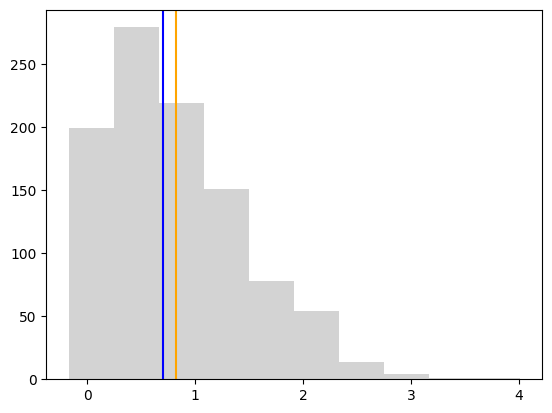

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x=np.mean(x),color='orange')
plt.axvline(x=np.median(x),color='blue')
plt.hist(x,color='lightgray')       # Mode is least effected by the skewness but it is only applicable for only PMS

## Quantiles
Quantiles divides our distribution

Median is also the well known quantile which divides at the mid point

In [ ]:
np.median(x)

0.6987365121323832

In [ ]:
np.quantile(x,0.5)

0.6987365121323832

Generally speaking, quantiles divide up distributions and the most common are:

- Percentiles,
- Quartiles, and
- Deciles.

**Percentiles** divide the distribution at any point out of one hundred ("pour cent" is French for "out of a hundred"). For example, if we'd like to identify the threshold for the top 5% of a distribution, we'd cut it at the 95th percentile. Or, for the top 1%, we'd cut at the 99th percentile.

In [ ]:
p = np.percentile(x,[95,99])
p

array([2.06249928, 2.51830108])

(array([199., 279., 219., 151.,  78.,  54.,  14.,   4.,   1.,   1.]),
 array([-0.17083839,  0.24688731,  0.66461301,  1.08233872,  1.50006442,
         1.91779012,  2.33551582,  2.75324152,  3.17096722,  3.58869293,
         4.00641863]),
 <BarContainer object of 10 artists>)

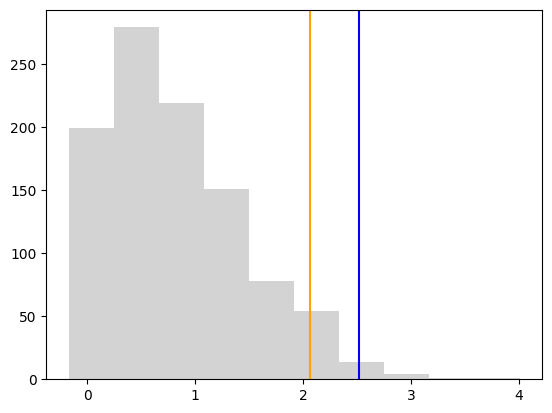

In [ ]:
fig, ax = plt.subplots()

plt.axvline(x=p[0],color='orange')
plt.axvline(x=p[1],color='blue')
plt.hist(x,color='lightgrey')

In [ ]:
p = np.quantile(x,[.95,.99])
p

array([2.06249928, 2.51830108])

### Quartiles
Divides the distribution into quarters 25% 50% and 75%

In [ ]:
q = np.percentile(x,[25,50,75])
q

array([0.32494046, 0.69873651, 1.19431522])

(array([199., 279., 219., 151.,  78.,  54.,  14.,   4.,   1.,   1.]),
 array([-0.17083839,  0.24688731,  0.66461301,  1.08233872,  1.50006442,
         1.91779012,  2.33551582,  2.75324152,  3.17096722,  3.58869293,
         4.00641863]),
 <BarContainer object of 10 artists>)

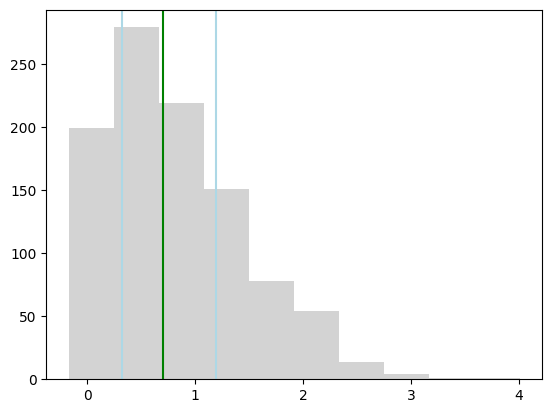

In [ ]:
fig, ax = plt.subplots()

plt.axvline(x=q[0],color='lightblue')
plt.axvline(x=q[1],color='green')
plt.axvline(x=q[2],color='lightblue')
plt.hist(x,color='lightgrey')

### Deciles
Divides the segment or the distribution into 10 equally sized parts

In [ ]:
[i for i in range(10,100,10)]

[10, 20, 30, 40, 50, 60, 70, 80, 90]

In [ ]:
d = np.percentile(x,range(10,100,10))
d

array([0.11871856, 0.24991108, 0.3992659 , 0.53290322, 0.69873651,
       0.86771624, 1.08994827, 1.30781239, 1.75782249])

In [ ]:
fig, ax = plt.subplots()
# for d_l in d:
#   plt.axvline(x=d_l,color='cornflowerblue')
[plt.axvline(x=d_i,color='cornflowerblue') for d_i in d]
plt.hist(x,color='lightgrey')

(array([199., 279., 219., 151.,  78.,  54.,  14.,   4.,   1.,   1.]),
 array([-0.17083839,  0.24688731,  0.66461301,  1.08233872,  1.50006442,
         1.91779012,  2.33551582,  2.75324152,  3.17096722,  3.58869293,
         4.00641863]),
 <BarContainer object of 10 artists>)

## Box and Whisker Plots

In [ ]:
sns.set(style='whitegrid')

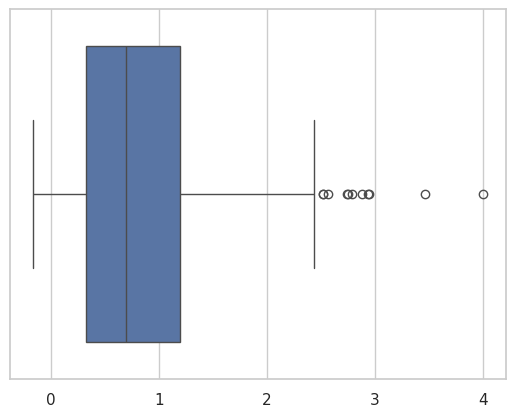

In [ ]:
sns.boxplot(x=x)

Box edges and the median are determinied by the quartiles

In [ ]:
q   #These are the quartiles i.e 25% , 50%, 75%

array([0.32494046, 0.69873651, 1.19431522])

Box edges define the **Inter-Quartile Range (IQR)**

In [ ]:
# IQR
r = 1.194-0.324
r

0.8699999999999999

0.8699999999999999

Whisker lengths are determined by furthest data points within 1.5 * IQR
 of the box edges.

In this case, the lower whisker could stretch as far down (to the left in the plot) as:

In [ ]:
0.325 - 1.5*r

-0.9799999999999998

-0.9799999999999998

The lowest value is inside of that so the whisker is plotted where that lowest value is:

In [ ]:
np.min(x)

-0.17083838831568182

The upper whisker could stretch as far up (to the right in the plot) as:

In [ ]:
1.194 + 1.5*r

2.4989999999999997

There are several (eleven) values beyond this threshold in the distribution. These values are considered **outliers** and are plotted as individual points:

In [ ]:
x.sort()

In [ ]:
x[-16:]

array([2.39363782, 2.39810074, 2.40295599, 2.41430044, 2.43541111,
       2.51827951, 2.52043572, 2.56177972, 2.74024547, 2.74882884,
       2.78877435, 2.88399304, 2.93368541, 2.94293176, 3.46465001,
       4.00641863])

The twelth-highest value, 2.435, is the largest within the upper whisker's maximum reach and so the upper whisker is plotted there.

Box-and-Whisker plots are useful for the comparing and examining the distributions

In [ ]:
iris = sns.load_dataset('iris')    # It has 4 features ans for 3 types of species each one has 50 rows
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<Axes: >

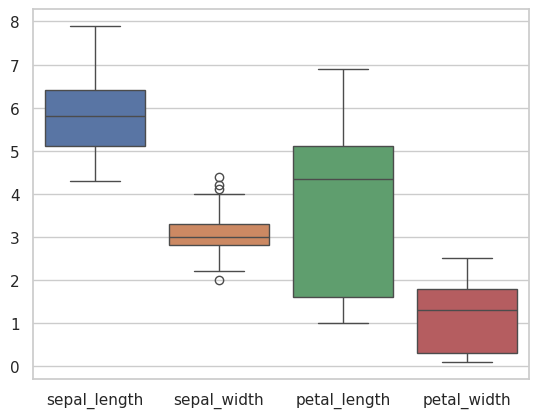

In [ ]:
sns.boxplot(iris)

By observing the box plot we can say by seeing the sepal_width it has less varience i.e less variation and all the values are very much closer to the media
By seeing the petal_width the variation is soo large...Like this by using boxplot we can get lot of information about the distribution

In [ ]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: xlabel='day', ylabel='total_bill'>

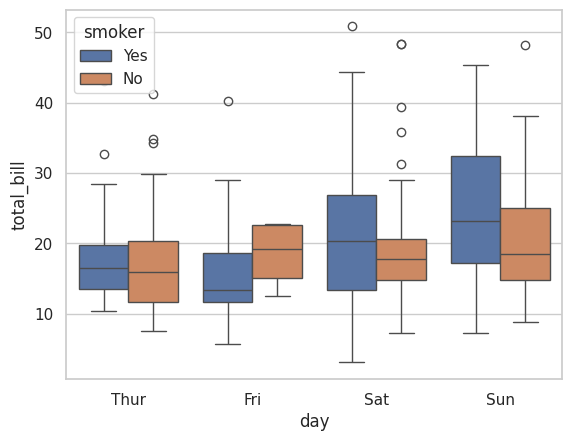

In [ ]:
sns.boxplot(x='day',y='total_bill',hue='smoker',data=tips)

IQR is a relatively rare measure of the dispersion of values around the center of a distribution. The most widely-used are:

* Variance,
* Standard deviation, and
* Standard error.

**Variance** (denoted with $\sigma^2$) can be written using expected-value notation, but it's easier to understand without it:
$$ \sigma^2 = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n} $$

In [ ]:
xbar = np.mean(x)
xbar

0.8219573880882259

In [ ]:
squared_diff = [(x_i-xbar)**2 for x_i in x]
# squared_diff

In [ ]:
sigma_squared = sum(squared_diff)/len(x)
sigma_squared

0.39813585982250543

Built-In method in Numpy

In [ ]:
np.var(x)

0.3981358598225057

## Standard Deviation
A straightforward derivative of variance is **standard deviation** (denoted with $\sigma$), which is convenient because its units are on the same scale as the values in the distribution:
$$ \sigma = \sqrt{\sigma^2} $$

In [ ]:
sigma = sigma_squared**0.5
sigma

0.6309800787841923

In [ ]:
np.std(x)

0.6309800787841925

(array([199., 279., 219., 151.,  78.,  54.,  14.,   4.,   1.,   1.]),
 array([-0.17083839,  0.24688731,  0.66461301,  1.08233872,  1.50006442,
         1.91779012,  2.33551582,  2.75324152,  3.17096722,  3.58869293,
         4.00641863]),
 <BarContainer object of 10 artists>)

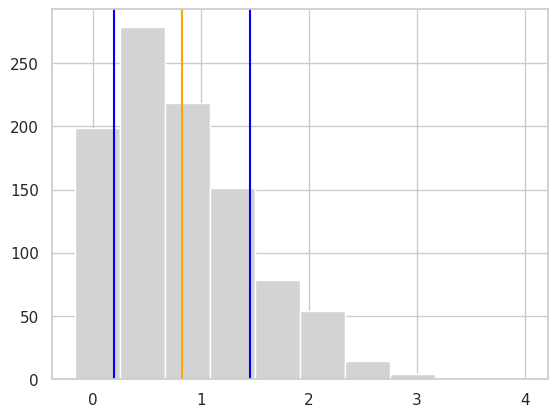

In [ ]:
fig, ax = plt.subplots()

plt.axvline(xbar,color='orange')
plt.axvline(x=xbar+sigma,color='blue')
plt.axvline(x=xbar-sigma,color='blue')
plt.hist(x,color='lightgray')

## Standard Error
A further derivation of standard deviation is **standard error**, which is denoted with $\sigma_\bar{x}$:
$$ \sigma_\bar{x} = \frac{\sigma}{\sqrt{n}} $$

In [ ]:
sigma / len(x)**0.5

0.019953342071505353

In [ ]:
st.sem(x)   # Which is very close to that we calculated because by default it is 1 degree of freedom (n-1), which can be ignoredwith the larger data sets

0.01996332623128527

In [ ]:
st.sem(x,ddof=0) #Set to 0 degree i.e n

0.01995334207150536

## Measure of Relatedness
If we have two vectors of the same length, $x$ and $y$, where each element of $x$ is paired with the corresponding element of $y$, **covariance** provides a measure of how related the variables are to each other:
$$ \text{cov}(x, y) = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) }{n} $$

In [ ]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
# Let's see is there any relation exist between petal length and sepal length
x = iris.sepal_length
y = iris.petal_length

<Axes: xlabel='sepal_length', ylabel='petal_length'>

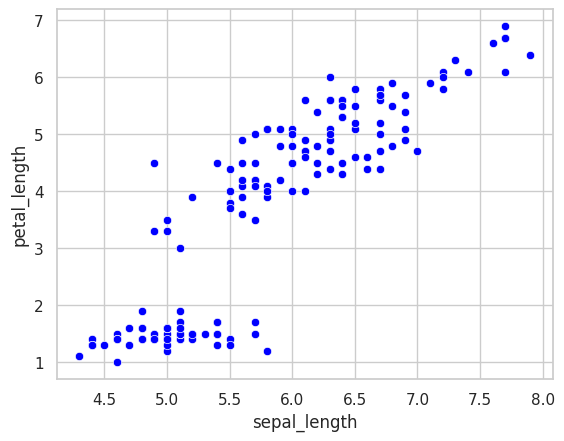

In [ ]:
sns.scatterplot(x=x,y=y,color='blue')  # We can clearly observe that if the sepal_size increases petal size also increases

In [ ]:
# Lets know what is the covariance
xbar = np.mean(x)
ybar = np.mean(y)

In [ ]:
n = len(x)
n

150

In [ ]:
# Lets find the numerator
product = []
for i in range(n):
  product.append((x[i]-xbar)*(y[i]-ybar))

In [ ]:
cov = sum(product)/n
cov

1.2658200000000006

Numpy **cov** method returns the 2*2 matrci where the diagonal elements are variance of x and y respectively and the remaining are the covariance of that distributions

In [ ]:
np.cov(x,y,ddof=0) # By default degree of freedom is 1

array([[0.68112222, 1.26582   ],
       [1.26582   , 3.09550267]])

In [ ]:
np.var(x)

0.6811222222222223

In [ ]:
np.var(y)

3.0955026666666665

If the covariance is +ve it means there is a positive relationship i.e as one distribution increases the other also increses abd vice-versa
If the covariance is -ve means there is negative relation which means if one decreases the other increases like that

The less related they the closer the covariance to ***0***

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

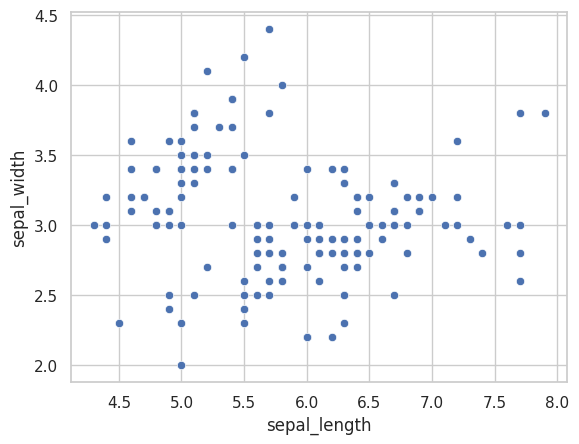

In [ ]:
sns.scatterplot(x=iris.sepal_length,y=iris.sepal_width)

In [ ]:
np.cov(iris.sepal_length,iris.sepal_width,ddof=0)

array([[ 0.68112222, -0.04215111],
       [-0.04215111,  0.18871289]])

### Correlation
A drawback of covariance is that it confounds the relative scale of two variables with a measure of the variables' relatedness. **Correlation** builds on covariance and overcomes this drawback via rescaling, thereby measuring relatedness exclusively. Correlation is much more common because of this difference.

The correlation coefficient(developed by Karl Pearson in the 20th c. though known in the 19th c.) is denoted with $r$ or $\rho$ and is defined by:
$$ \rho_{x,y} = \frac{\text{cov}(x,y)}{\sigma_x \sigma_y} $$

In [ ]:
# Let's use the covariance of the sepal_width and the sepal_length
cov = -0.04215111
sigma_sq_x = 0.68112222
sigma_sq_y = 0.18871289

In [ ]:
sigma_x = sigma_sq_x**0.5
sigma_y = sigma_sq_y**0.5

In [ ]:
cov/ (sigma_x*sigma_y)

-0.11756978087951572

In [ ]:
st.pearsonr(iris.sepal_length,iris.sepal_width) # Second value is the statistical significance

PearsonRResult(statistic=-0.11756978413300206, pvalue=0.15189826071144746)

In [ ]:
st.pearsonr(iris.sepal_length,iris.sepal_width)[0]

-0.11756978413300206

he closer $\rho$ is to 1 or -1, the stronger the positive or negative correlation, respectively:

 $$-1 <= \rho <=1$$

In [ ]:
st.pearsonr(iris.sepal_length,iris.petal_length)[0]

0.8717537758865831

Note:Covariance and correlation only account for linear relationships. Two variables could be non-linearly related to each other and these metrics could come out as zero.

# Distributions in Machine Learning

## Uniform

Uniform distribution has constant probabilities across the entire range of values in it's domain

In [ ]:
u = np.random.uniform(size=10000)

In [ ]:
sns.set_style('ticks')

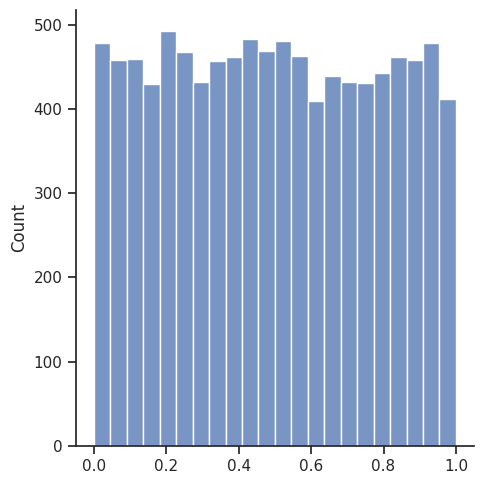

In [ ]:
sns.displot(x=u)  #Distribution plot
# As the size of the distribution increases further the bars should be equal further more

Real-world examples include:

- Dice rolling (PMF)  # Discrete
- Card drawing (PMF)  # Discrete
- Model hyperparameters
- Emission of radioactive particles
- Economic demand
- Analog-to-digital signal quantization errors

## Gaussian Distribution
Carl Friedrich Gauss ..,Gaussian distribution also known as "bull curve" or ***Normal Distribution***

In [ ]:
x = np.random.normal(size=10000)

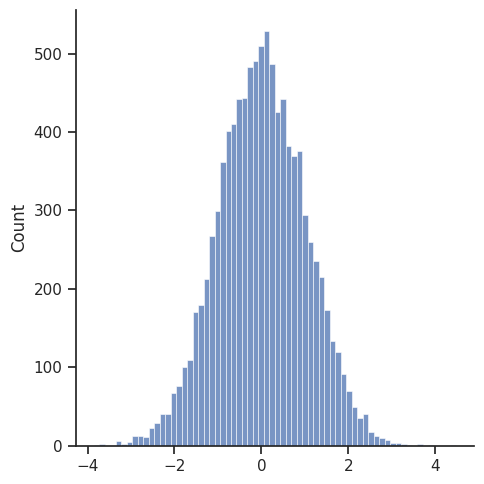

In [ ]:
sns.displot(x=x)   # All these functions returns the continuous distributions

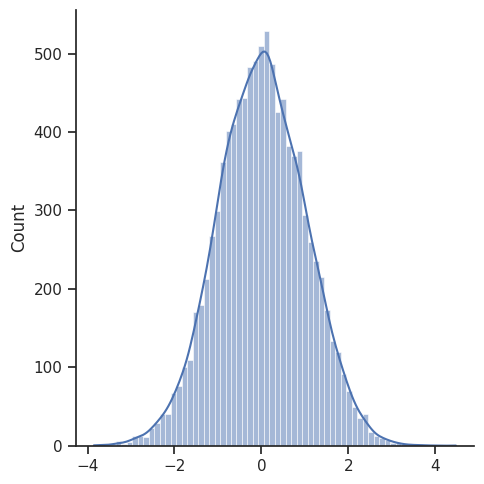

In [ ]:
sns.displot(x=x,kde='True')

When the normal distribution has a mean ($\mu$) of zero and standard deviation ($\sigma$) of one, as it does by default with the NumPy `normal()` method...

In [ ]:
np.mean(x)

0.010746657894433886

In [ ]:
np.std(x)

1.006376502514602

...it is a **standard normal distribution** (a.k.a., standard Gaussian distribution). Normal distributions can be denoted with the *math calligraphy* font as $\mathcal{N}(\mu, \sigma^2)$, thus the standard normal distribution can be denoted as $\mathcal{N}(0, 1)$.

(N.B.: $\sigma^2 = \sigma$ in this case because $1^2 = 1$.)

Normal distributions are by far the most common distribution in statistics and machine learning. They are typically the default option, particularly if you have limited information about the random process you're modeling, because:

1. Normal distributions assume the greatest possible uncertainty about the random variable they represent (relative to any other distribution of equivalent variance).
2. Simple and very complex random processes alike are, under all common conditions, normally distributed when we sample values from the process. Since we sample data for statistical and machine learning models alike, this so-called **central limit theorem** (covered next) is a critically important concept.

Real-world examples include:

* Probability of heads across *n* tosses
* Sum of dice rolls (PMF)
* Height of adult women
* Height of adult men
* Education test scores

In [ ]:
n_experiments=10000
heads_count = [np.random.binomial(100,0.5) for i in range(n_experiments)]
heads,event_count = np.unique(heads_count,return_counts=True)
event_prob = event_count/n_experiments

Text(0, 0.5, 'Probability')

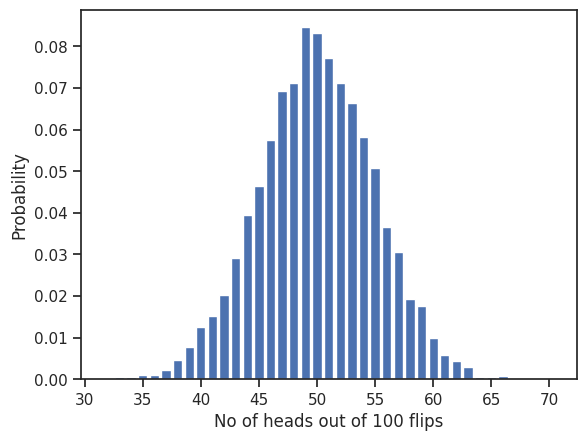

In [ ]:
plt.bar(heads,event_prob)
plt.xlabel("No of heads out of 100 flips")
plt.ylabel('Probability')

## Central Limit Theorem

The Central Limit Theorem (CLT) is a fundamental theorem in statistics that states that the distribution of the sum (or average) of a large number of independent, identically distributed (i.i.d.) random variables approaches a normal distribution, regardless of the original distribution of the variables.

In [ ]:
x = np.random.normal(size=10000)

In [ ]:
x_sample = np.random.choice(x,size=10,replace=False)
# Here we are selection the random 10 values without replacement from the distribution

In [ ]:
x_sample

array([ 0.34296475, -3.28815673, -0.13861227, -0.50937768,  0.48878908,
       -0.85432738,  1.24922417, -0.94492674,  0.83512048,  0.03827651])

In [ ]:
np.mean(x)#True mean

-0.0056365092386018835

In [ ]:
np.mean(x_sample)

-0.278102581193164

In [ ]:
def sample_mean_calculator(input_dist,sample_size,n_samples):   # This method returns the distribution of means of samples from the distribution
  sample_means = []
  for i in range(n_samples):
    sample = np.random.choice(input_dist,size=sample_size,replace=False)
    sample_means.append(sample.mean())

  return sample_means

(-1.5, 1.5)

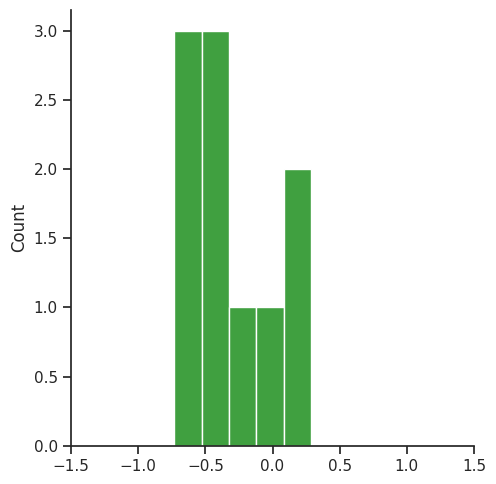

In [ ]:
#d = sample_mean_calculator(x,10,10)
sns.displot(sample_mean_calculator(x, 10, 10), color='green')
plt.xlim(-1.5,1.5)

The more samples we take the sample distribution of the mean is more likely normally distributed

(-1.5, 1.5)

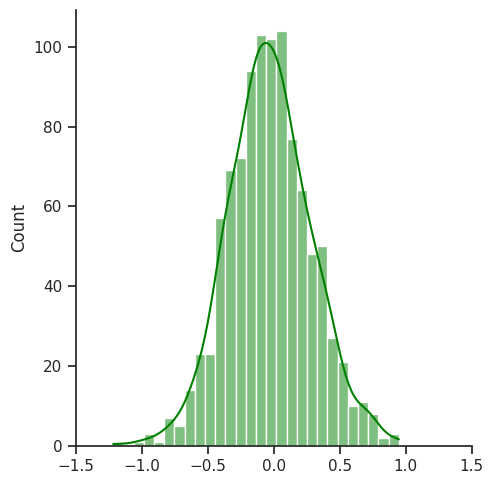

In [ ]:
sns.displot(sample_mean_calculator(x,10,1000),color='green',kde=True)
plt.xlim(-1.5,1.5)

(-1.5, 1.5)

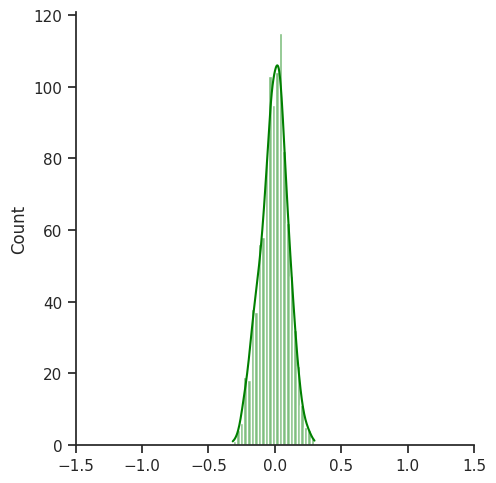

In [ ]:
sns.displot(sample_mean_calculator(x,100,1000),color='green',kde=True)
plt.xlim(-1.5,1.5)

(-1.5, 1.5)

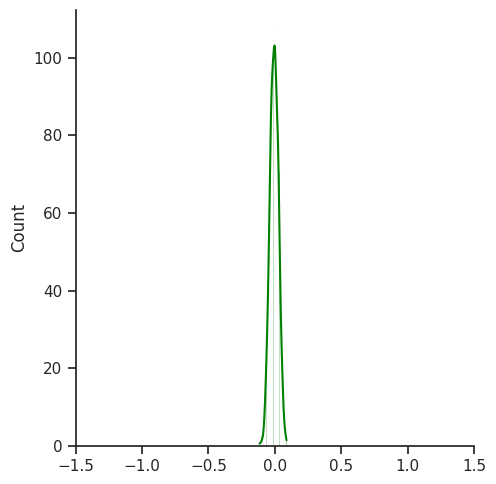

In [ ]:
sns.displot(sample_mean_calculator(x,1000,1000),color='green',kde=True)
plt.xlim(-1.5,1.5)

If we increase our sample size or the no of samples we'll get the graph tighter and tighter which means the distribution is distributed tightly about the mean of the original distrribution

Central limit therem not only works for the Normal distributions it works for any king of the distributions
Let's work with a skewed distribution

In [ ]:
s = st.skewnorm.rvs(10,size=10000)

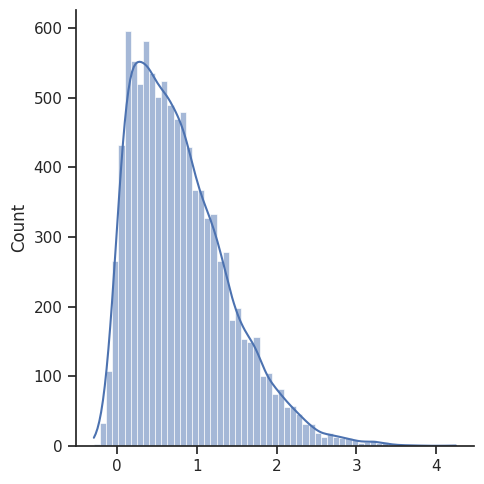

In [ ]:
sns.displot(s,kde=True)

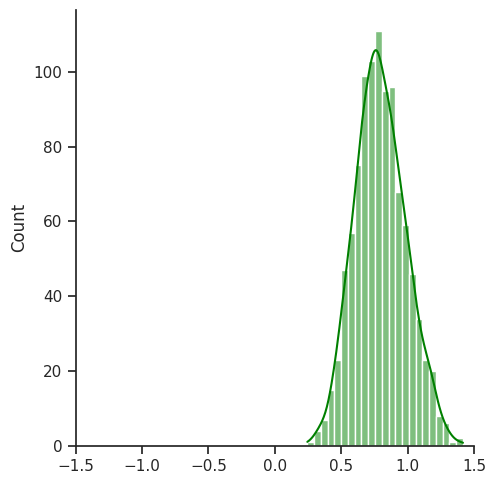

In [ ]:
_= sns.displot(sample_mean_calculator(s,10,1000),color='green',kde=True)
_=plt.xlim(-1.5,1.5)

(-1.5, 1.5)

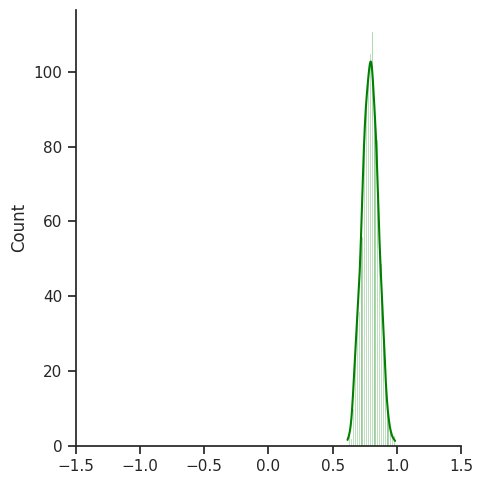

In [ ]:
sns.displot(sample_mean_calculator(s,100,1000),color='green',kde=True)
plt.xlim(-1.5,1.5)

### Sampling from a Multimodel distribution

In [ ]:
m = np.concatenate((np.random.normal(size=4000),np.random.normal(loc=4.0,size=4000)))

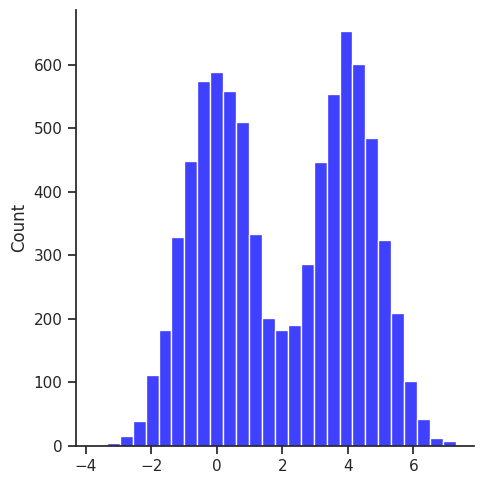

In [ ]:
_=sns.displot(m,color='blue')

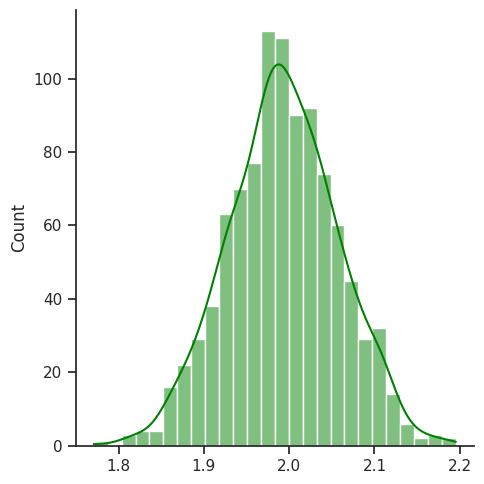

In [ ]:
_=sns.displot(sample_mean_calculator(m,1000,1000),color='green',kde=True)

### Sampling from Uniform
Even sampling from a highly non-normal unifrom distribution

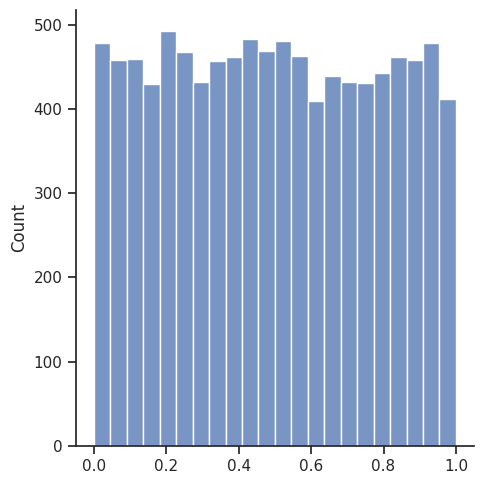

In [ ]:
_=sns.displot(u)

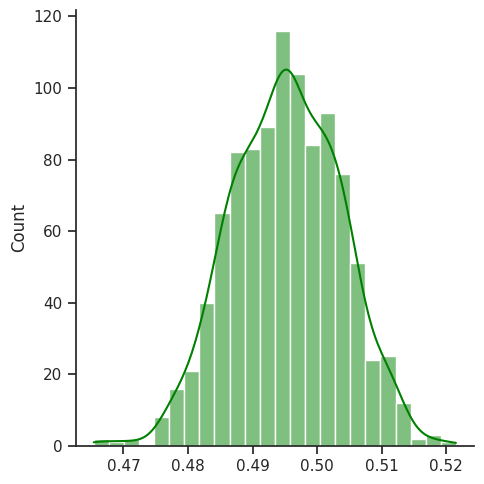

In [ ]:
sns.displot(sample_mean_calculator(u,1000,1000),color='green',kde=True)

Therefore, with large enough sample sizes, we can assume the sampling distribution of the means will be normally distributed, allowing us to apply statistical and ML models that are configured for normally distributed noise, which is often the default assumption.

As an example, the "t-test"  allows us to infer whether two samples come from different populations (say, an experimental group that receives a treatment and a control group that receives a placebo). Thanks to the CLT, we can use this test even if we have no idea what the underlying distributions of the populations being tested are, which may be the case more frequently than not.

(Despite being associated with such a key concept as the CLT, the name "normal distribution" wasn't originally intended to imply that other distributions are "abnormal". It's a historical quirk related to Gauss describing orthogonal (technically a.k.a. "normal") equations associated with applied uses of the distribution.)

(Finally, you may wonder what the purpose of sampling means is! Well, when we gather data from the real world we are nearly always sampling a subset of all the available data produced by a given random process. And, once we've collected a sample of data, the aspect of it we're often most interested in above all else is its mean.)

## Log-Normal Distribution
The natural logorithm of the log-normal distribution is Normally distributed

In [ ]:
x = np.random.lognormal(size=10000)   # By-default the mu = 0 and the std i.e Standard deviation to, sigma = 1

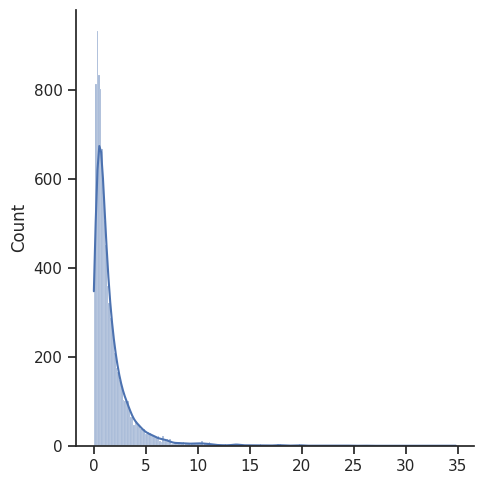

In [ ]:
_=sns.displot(x,kde=True)

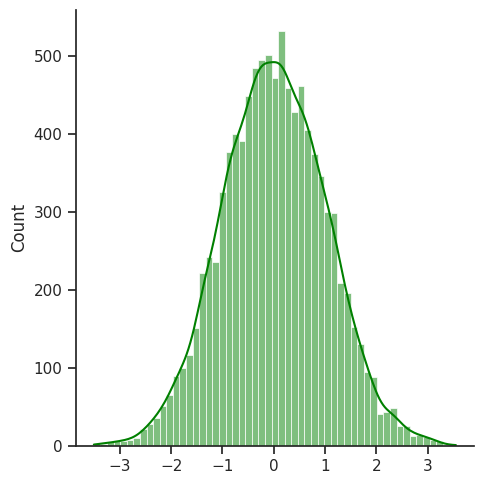

In [ ]:
_=sns.displot(np.log(x),color='green',kde=True)

Real-world examples:

* Income
* Length of comments in online forums
* Duration of chess games or Rubik's Cube solves
* Size of publicly-available video files
* Number of hospitalized cases in an epidemic where public interventions are involved

## Exponential Distribution
Relatively squished up against zero and then decreases exponentially toward higher values. Log-normal distribution, in contrast, could take negative values and both increases and decreases.

In [ ]:
x = np.random.exponential(scale=4,size=10000)  # Default the size is set to 1

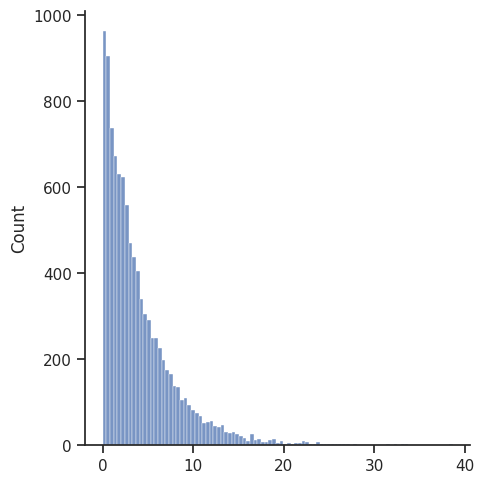

In [ ]:
_= sns.displot(x)

The logorithm of the exponential distribution is a skewed distribution

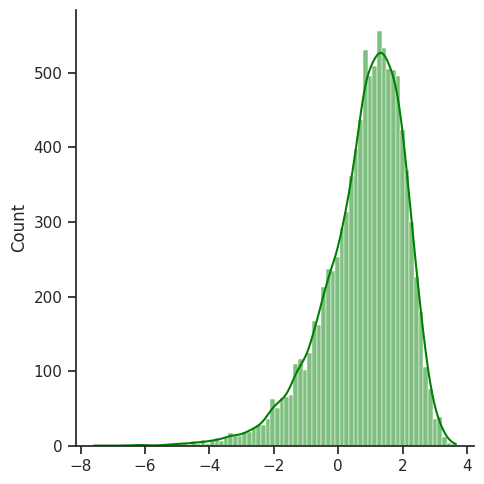

In [ ]:
_= sns.displot(np.log(x),color='green',kde=True)

Real-world examples:

* Time between requests to access Wikipedia pages
* Used frequently in deep learning

## Laplace Distribution

In [ ]:
x = np.random.laplace(size=10000)

Alternatively referred to as the "Double exponential Distribution"

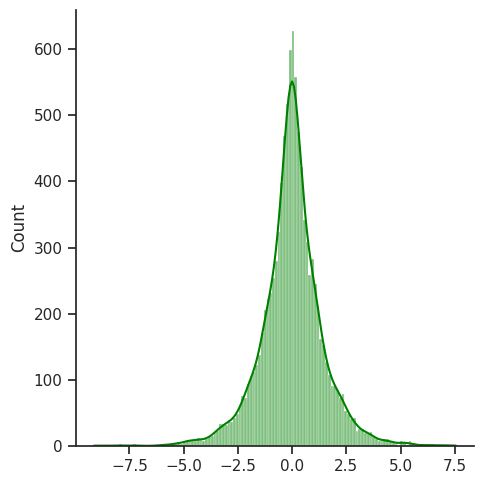

In [ ]:
_= sns.displot(x,color='green',kde=True)

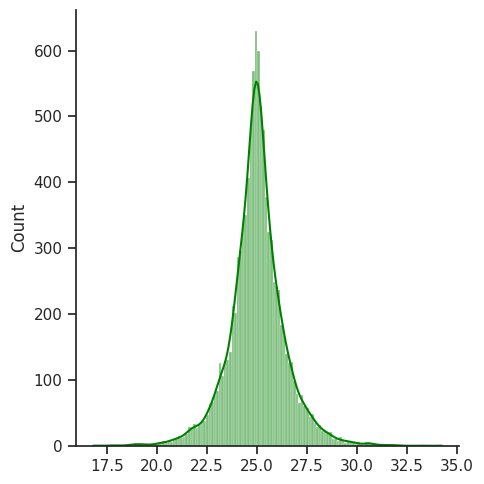

In [ ]:
# We can change the location of the mean od the distribution
_= sns.displot(np.random.laplace(loc=25,size=10000),color='green',kde=True)

Real-world examples:

* Extreme weather events, e.g., maximum rainfall in a day
* Many machine learning applications; wherever an acute peak of probability is desired

## Binomial Distribution
The binomial distribution is a discrete probability distribution that describes the number of successes in a fixed number of independent trials of a binary experiment. Each trial can result in one of two outcomes: success or failure.

All distributions so far have been for continuous variables (PDFs). This one is discrete (PMF).

We've already been using it for coin flips; it's used for binary (0 or 1) outcome.

Its parameters are:

* *n*: number of trials
* *p*: probability of outcome of 1
* *size*: number of experiments with *n* trials each

In [ ]:
n = 5
n_experiments = 1000
p = 0.5 # for fair coin

In [ ]:
heads_count = np.random.binomial(n,0.5,n_experiments)
heads,event_count = np.unique(heads_count,return_counts=True)

In [ ]:
heads

array([0, 1, 2, 3, 4, 5])

In [ ]:
event_count

array([ 29, 159, 332, 301, 146,  33])

In [ ]:
event_prob = event_count/n_experiments

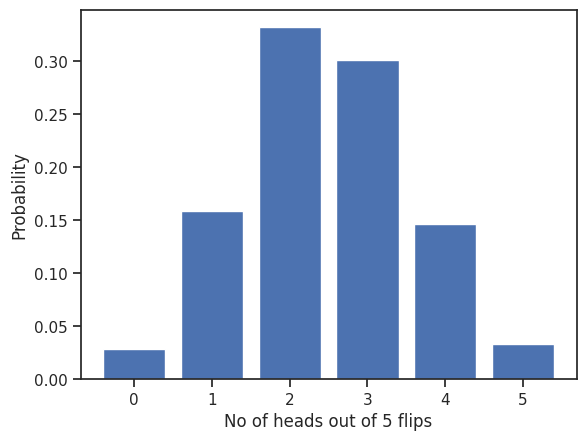

In [ ]:
plt.bar(heads,event_prob)
plt.xlabel("No of heads out of 5 flips")
_= plt.ylabel('Probability')

For not equally likely experiment and the sucess probability P = 0.8

In [ ]:
heads_count = np.random.binomial(n,0.8,n_experiments)
heads,event_count = np.unique(heads_count,return_counts=True)
event_prob = event_count/n_experiments

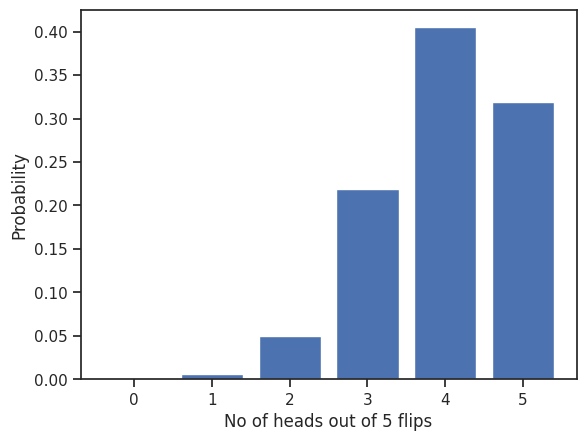

In [ ]:
plt.bar(heads,event_prob)
plt.xlabel("No of heads out of 5 flips")
_= plt.ylabel('Probability')

binomial distributions are created by sampling $n>1$ "Bernoulli trials". The **Bernoulli** distribution is equivalent to the binomial distribution where $n=1$:

In [ ]:
np.random.binomial(1,0.5)

1

Real-world examples:

* Making it to work on time
* Candidate being invited to interview
* Epidemiology: probability of death or catching disease

## Multinomial Distribution
 It is the generalization of the binomial distribution of the random variables from 2 possible outputs to **n** possible outpluts
 E.g. Rolling a Dice

In [ ]:
n = 1000 # 1000 experiments

In [ ]:
rolls = np.random.multinomial(n, [1/6.0]*6)
rolls

array([169, 177, 165, 155, 177, 157])

Text(0, 0.5, 'Frequency')

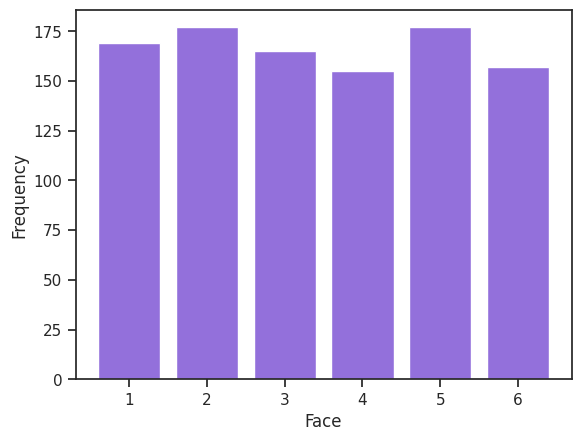

In [ ]:
plt.bar(range(1,7),rolls,color='mediumpurple')
plt.xlabel("Face")
plt.ylabel("Frequency")

Uniform distribution is for Continuous variables as like it the multinomial distribution is for the Discrete Random Variables

As like the binomial distribution Multinomial distributions are created by sampling n>1 multinoulli distributions, where the multinouli distribution is equivalent to the multinomial distribution when ***n=1***

In [ ]:
np.random.multinomial(1,[1/6.]*6)

array([1, 0, 0, 0, 0, 0])

## Poisson Distribution

Poisson distribution also used for the discrete random variables

It's named after French mathematician Simeon Denis Poisson and is used for count data, e.g.:

* Number of cars that drive by in a minute
* Number of guests at restaurant in an evening
* Number of new hires in a month

First argument to NumPy `poisson()` method is $\lambda$, which must be greater than zero and guides peak of probability distribution. E.g., sampling from Poisson with $\lambda=5$ will tend to draw samples near 5.

In [ ]:
lam = 5
n_experiments = 1000

In [ ]:
samples = np.random.poisson(lam,n_experiments)

In [ ]:
samples[0:20]

array([ 9,  2,  4,  4,  3,  2,  7,  2,  5,  4,  2,  6,  7,  3, 13,  3,  6,
        3,  8,  4])

In [ ]:
x,x_count = np.unique(samples,return_counts = True)

In [ ]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 16])

In [ ]:
x_count   # It means out of 1000 samples 8 of them are 0 and 175 out of them are 5 and so on...

array([  8,  30,  87, 158, 165, 173, 151, 115,  52,  33,  14,   9,   3,
         1,   1])

In [ ]:
Px = x_count/n
Px

array([0.008, 0.03 , 0.087, 0.158, 0.165, 0.173, 0.151, 0.115, 0.052,
       0.033, 0.014, 0.009, 0.003, 0.001, 0.001])

Text(0, 0.5, 'P(X)')

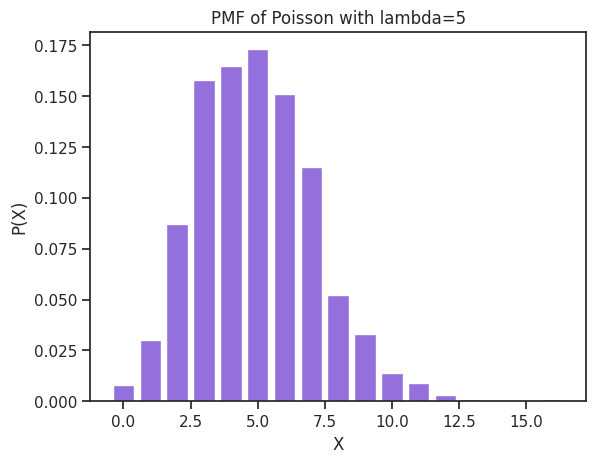

In [ ]:
plt.bar(x,Px,color='mediumpurple')
plt.title('PMF of Poisson with lambda={}'.format(lam))
plt.xlabel('X')
plt.ylabel('P(X)')

In [ ]:
print('Hi')

Hi


## Mixture Distributions
A mixture distribution is a probability distribution that arises from combining two or more component distributions, each of which may represent a different subpopulation or process within the overall data set. Essentially, a mixture distribution models the presence of distinct groups within the data, where each group follows its own probability distribution, but these groups are mixed together.

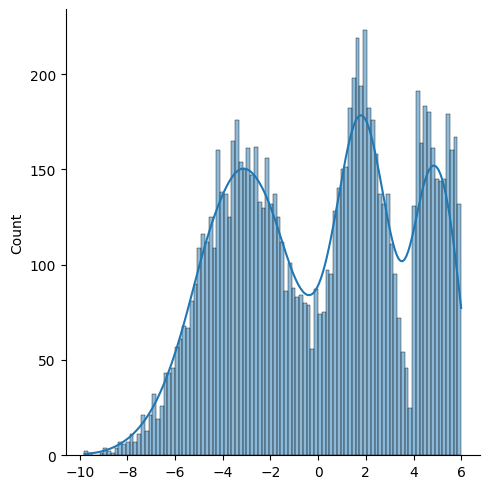

In [ ]:
distributions = [
    {"type": np.random.normal, "kwargs": {"loc": -3, "scale": 2}},  # Norma distrubutions of mean of -3 and standard deviation of 2
    {"type": np.random.uniform, "kwargs": {"low": 4, "high": 6}},
    {"type": np.random.normal, "kwargs": {"loc": 2, "scale": 1}},
]

coefficients = np.array([0.5, 0.2, 0.3])   # This line is for .5 is for normal, 0.2 is for uniform and .3 is for normal distributions
coefficients /= coefficients.sum()      # in case these did not add up to 1
sample_size = 10000

num_distr = len(distributions)
data = np.zeros((sample_size, num_distr))
for idx, distr in enumerate(distributions):
    data[:, idx] = distr["type"](size=(sample_size,), **distr["kwargs"])

random_idx = np.random.choice(np.arange(num_distr), size=(sample_size,), p=coefficients)
sample = data[np.arange(sample_size), random_idx]
_ = sns.displot(sample, bins=100, kde=True)

### Processing data for models
https://chatgpt.com/c/66f3798f-a7f0-800a-9fc6-8872fc1a3b23